In [1]:
# This is to develop the code the generate contrast curves
# in the lambda/B regime from the KS analysis done on the 
# ADI frames

# Created 2020 May 28 by E.S.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/test_lambda_over_b_1.csv")

In [10]:
df.keys()

Index(['Unnamed: 0', 'dist_asec', 'comp_ampl',
       'D_xsec_strip_w_planets_rel_to_strip_0',
       'D_xsec_strip_w_planets_rel_to_strip_1',
       'D_xsec_strip_w_planets_rel_to_strip_2',
       'D_xsec_strip_w_planets_rel_to_strip_3',
       'D_xsec_strip_w_planets_rel_to_strip_4',
       'val_xsec_crit_strip_w_planets_rel_to_strip_0',
       'val_xsec_crit_strip_w_planets_rel_to_strip_1',
       'val_xsec_crit_strip_w_planets_rel_to_strip_2',
       'val_xsec_crit_strip_w_planets_rel_to_strip_3',
       'val_xsec_crit_strip_w_planets_rel_to_strip_4'],
      dtype='object')

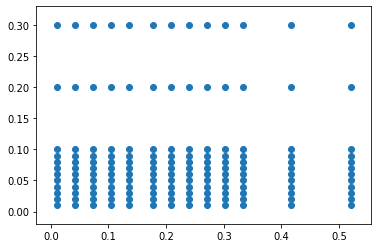

In [6]:
# print out a plot, so that the user can see level of completion 
# represented by the files available

plt.clf()
plt.scatter(df["dist_asec"],df["comp_ampl"])
plt.show()

In [11]:
X_asec, Y_ampl = np.meshgrid(df["dist_asec"],df["comp_ampl"])

CS = ax.contour(X_asec, Y_ampl, Z)

In [12]:
X_asec

array([[0.01040896, 0.04163584, 0.07286272, ..., 0.33308672, 0.4163584 ,
        0.520448  ],
       [0.01040896, 0.04163584, 0.07286272, ..., 0.33308672, 0.4163584 ,
        0.520448  ],
       [0.01040896, 0.04163584, 0.07286272, ..., 0.33308672, 0.4163584 ,
        0.520448  ],
       ...,
       [0.01040896, 0.04163584, 0.07286272, ..., 0.33308672, 0.4163584 ,
        0.520448  ],
       [0.01040896, 0.04163584, 0.07286272, ..., 0.33308672, 0.4163584 ,
        0.520448  ],
       [0.01040896, 0.04163584, 0.07286272, ..., 0.33308672, 0.4163584 ,
        0.520448  ]])

In [ ]:
plt.clf()
plt.contourf(X, Y, Z)

In [18]:
contour_data = df[["dist_asec","comp_ampl","D_xsec_strip_w_planets_rel_to_strip_1"]]

In [19]:
contour_data

,dist_asec,comp_ampl,D_xsec_strip_w_planets_rel_to_strip_1
0,0.010409,0.01,0.047170
1,0.041636,0.01,0.066038
2,0.072863,0.01,0.056604
3,0.104090,0.01,0.066038
4,0.135316,0.01,0.103774
...,...,...,...
151,0.270633,0.30,0.179245
152,0.301860,0.30,0.188679
153,0.333087,0.30,0.207547
154,0.416358,0.30,0.188679


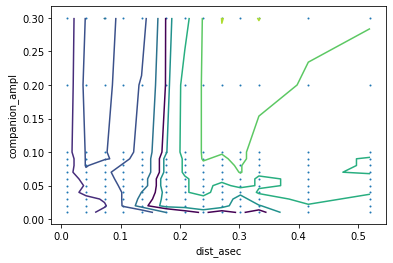

In [55]:
# make a new DataFrame from a subset of the data
# contour_data = df[["dist_asec","comp_ampl","D_xsec_strip_w_planets_rel_to_strip_1"]]
contour_data = df

#x = df["dist_asec"]
#y = df["comp_ampl"]
#z = df["D_xsec_strip_w_planets_rel_to_strip_1"]

Z = contour_data.pivot_table(index='dist_asec', 
                             columns='comp_ampl', 
                             values='D_xsec_strip_w_planets_rel_to_strip_1').T.values

X_unique = np.sort(contour_data.dist_asec.unique())
Y_unique = np.sort(contour_data.comp_ampl.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

# plot
fig = plt.figure()
ax = fig.add_subplot(111)

# underplot scatter plot of sampled points
sp = ax.scatter(contour_data["dist_asec"],contour_data["comp_ampl"], s=1)

# plot a contour plot
cp1 = ax.contour(X, Y, Z)

# overplot the critical line
df_levels = df.drop_duplicates(subset="val_xsec_crit_strip_w_planets_rel_to_strip_1", 
                               keep='first', 
                               inplace=False)
levels = df_levels["val_xsec_crit_strip_w_planets_rel_to_strip_1"].values
cp2 = ax.contour(X, Y, Z, levels = levels)

ax.set_xlabel("dist_asec")
ax.set_ylabel("companion_ampl")

#plt.savefig("junk_comp_w_4.pdf")

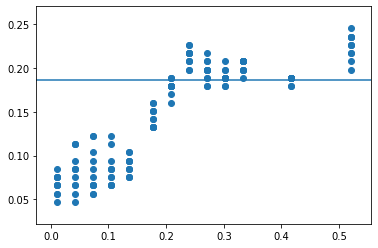

In [44]:
plt.scatter(contour_data["dist_asec"],contour_data["D_xsec_strip_w_planets_rel_to_strip_1"])
plt.axhline(y=df["val_xsec_crit_strip_w_planets_rel_to_strip_1"][0])
plt.show()

In [ ]:
## Now do the same comparison with the other strips that did not have
## the planets injected in them

In [ ]:
## Take the median across the slices

In [ ]:
## Interpolate to find companion amplitudes at the critical KS value-- that's the contrast curve!